<a href="https://colab.research.google.com/github/younghoonNa/PyTorch/blob/main/Pytorch/Pytorch_(Linear%26Multivariate)_(Regression%26classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파트

- Data definition (학습할 데이터)
- Hypothesis (학습 모델)
- Compute loss (loss 계산)
- Gradient descent (기울기 소실)

In [2]:
import torch
import torch.optim as optim
import numpy as np

In [3]:
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[2,], [4], [6]])

## Hypothesis 학습 모델

<b>for Linear Regression </b>

- ` y = Wx + b `

- W is `Weight`
- b is `Bias`
- `Require_grad is True` is mean `fit = True`

In [4]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

hypothesis = x_train * W + b

## Compute loss

- 우리의 모델이 얼마나 가까울까??? -> Cost or loss
- Linear Regression 에서는 주로 MSE로 계산. 

In [5]:
cost = torch.mean((hypothesis - y_train) ** 2)

In [6]:
# optimizer = optim.SGD([W,b], lr = 0.01)

# optimizer.zero_grad() #gradient 초기화는 zero_grad()
# cost.backward() #backward() 로 gradient 게산
# optimizer.step() #step() 을 통해 개선

## 한 줄로 살펴보기.

In [7]:
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[2,], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr = 0.01)

nb_epoches = 1000
for epoch in range(1, nb_epoches+1):
  hypothesis = x_train * W + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


In [8]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Deeper Look at Gradient Desecnt

- Hypothesis function
- 사용할 모의 data 확인
- Cost_function 
- Gradient descent 이론
- Gradient descent 구현
- Gradient descent 구현 (nn.optim)

`H(x) = Wx + b`

- W : weight
- b : bias

<b> 이번에는 bias를 없앤 단순한 인공신경망을 만들어보자 </b>

In [9]:
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[1], [2], [3]])

# -> 학습 데이터가 단순하므로, W weight의 값은 1에 수렴할 수록 더 좋은 모델이라고 할 수 있음.
# mse 값 (cost)는 낮을 수록 더 좋음. -> 오차가 적기 때문.
# MSE = torch.mean((hypothsis - y_train) ** 2)

## gradient descent를 통해 최적의 cost 값을 찾아내야 한다.

In [10]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화 
W = torch.zeros(1)

#learning rate 설정
lr = 0.1

nb_epoches = 10
for epoch in range(nb_epoches + 1):

  #H(x) 계산
  hypothesis = x_train + W

  # Cost gradient 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
  gradient = torch.sum((W * x_train - y_train) * x_train)

  print("Epoch {:4d}/{} W: {:3f}, Cost {:.6f}".format(
      epoch, nb_epoches, W.item(), gradient.item()
  ))

  #cost gradient로 H(x) 개선
  W -= lr * gradient

Epoch    0/10 W: 0.000000, Cost -14.000000
Epoch    1/10 W: 1.400000, Cost 5.599999
Epoch    2/10 W: 0.840000, Cost -2.240000
Epoch    3/10 W: 1.064000, Cost 0.896000
Epoch    4/10 W: 0.974400, Cost -0.358399
Epoch    5/10 W: 1.010240, Cost 0.143359
Epoch    6/10 W: 0.995904, Cost -0.057343
Epoch    7/10 W: 1.001638, Cost 0.022938
Epoch    8/10 W: 0.999345, Cost -0.009175
Epoch    9/10 W: 1.000262, Cost 0.003670
Epoch   10/10 W: 0.999895, Cost -0.001468


## Gradient Desecent with torch.optim 

- torch.optim 으로도 gradient descent를 정의 할 수 있다.
  - 시작할 떄 optimizer 정의
  - optimizer.zero_grad() 로 gradient를 0으로 초기화
  - cost.backward() 를 통해 gradient 계산 -> 백프로파게이션, 즉 역전파를 통한 gradient 계산.
  - optimizer.step() 으로 gradient descent 

- 우리의 모델은 `H(x) = Wx` 이므로 학습가능한 하나의 변수인 x를 가지고 있다.
- `optimizer = optim.SGD([W], lr=0.15)` learing rate는 임의로 설정.

<b> optimizer 설정 </b> <br>
`optimizer = optim.SGD([W], lr=0.15)`

<br>

<b> cost H(x) 개선 </b> <br>
`optimizer.zero_grad()` : optimizer에 저장되어있는 모든 학습 가능한 변수의 gradient를 0으로 초기화 시킴.  <br>
`cost.backward()` : cost function을 미분하여 각 변수의 gradient 값을 채움 <br>
`optimizer.step()` : 저장된 gradient 값을 통해 gradient descent 실행. <br>


# Multivariate Linear Regression

- H(x) = Wx + b  -> Simple Linear Regression
- H(x) = W1x1 + W2x2 + W3x3 + b -> `Multivariate Linear Regression

H(x) = `x1_train * w1` + `x2_train * w2` + `x3_train * w3` + b  -> 와 같은 꼴로 나타 낼 수 있음. <b> 근데 여기서 W의 수가 늘어난다면 ..? </b>
<br>
<br>

### Matmul() 에 대해 알아보자

- matmul()로 한번에 계산.
  - Matrix Multification 의 줄임말.
  1. 더 간결하고,
  2. x의 길이가 바뀌어도 코드를 바꿀 필요가 없으며
  3. 속도도 더 빠름.!

  - `hypothesis = x_train.matmul(x) + b`


### Multivariate Linear Regression 의 cost function : MSE





In [11]:
x_train = torch.Tensor([[73, 80, 75],
                        [93, 88, 93],
                        [89, 91, 90],
                        [96, 98, 100],
                        [73, 66, 70]])

y_train = torch.Tensor([[152], [185], [180], [196], [142]])

W = torch.zeros((3,1), requires_grad=True)
h = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1e-5)

In [13]:
nb_epochs = 20

for epoch in range(nb_epochs + 1):

  #H(x) 계산
  hypothesis = x_train.matmul(W) + b

  #cost
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print("Epoch {:4d}/{} hypothesis : {} Cost: {:.6f}".format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20 hypothesis : tensor([67.2985, 80.8752, 79.6882, 86.7726, 61.7033]) Cost: 9291.392578
Epoch    1/20 hypothesis : tensor([104.9390, 126.1171, 124.2655, 135.3161,  96.2117]) Cost: 2913.471191
Epoch    2/20 hypothesis : tensor([126.0124, 151.4466, 149.2226, 162.4939, 115.5319]) Cost: 914.331360
Epoch    3/20 hypothesis : tensor([137.8104, 165.6277, 163.1951, 177.7096, 126.3487]) Cost: 287.706665
Epoch    4/20 hypothesis : tensor([144.4155, 173.5674, 171.0178, 186.2283, 132.4049]) Cost: 91.292587
Epoch    5/20 hypothesis : tensor([148.1133, 178.0126, 175.3973, 190.9975, 135.7957]) Cost: 29.726517
Epoch    6/20 hypothesis : tensor([150.1833, 180.5015, 177.8492, 193.6676, 137.6942]) Cost: 10.428540
Epoch    7/20 hypothesis : tensor([151.3421, 181.8950, 179.2218, 195.1624, 138.7573]) Cost: 4.379158
Epoch    8/20 hypothesis : tensor([151.9906, 182.6754, 179.9903, 195.9993, 139.3527]) Cost: 2.482422
Epoch    9/20 hypothesis : tensor([152.3535, 183.1124, 180.4205, 196.4678, 139.6862

## 근데 코드가 너무 긴거같아

- Model 생성 -> nn.Module() 을 상속 받아 처리하자.!
- Cost function ->  torch.nn.Functional as F , nn.Functional 에서 다양한 cost function을 사용하자!

### 근데 코드가 길 지 않아?? - 모델 생성부분

<p>

`#모델초기화` <br>
W = torch.zeros((3,1) , requires_grad = True) <br>
b = torch.zeros(1, requires_grad = True) <br>
<br>

`#H(x) 계산` <br>
hypothesis = x_train.matmul(W) + b <br> 

</p>

### 그래서 모듈을 상속 받아서 처리하면 어떨까???

<p>

import torch.nn as nn <br>

class MultivariateLinearRegressionModel(nn.Module): <br>
&nbsp; &nbsp; def `__init__` (self): <br>
&nbsp; &nbsp; &nbsp; &nbsp;  super().`__init__()` <br>
&nbsp; &nbsp; &nbsp; &nbsp;  self.linear = nn.Linear(3,1)<br>

&nbsp; &nbsp; def forward(self, x): <br>
&nbsp; &nbsp; &nbsp; &nbsp; return self.linear(x) <br>

hypothesis = model(x_train)

</p>

- nn.Module() 을 상속해서 모델을 생성 
- nn.Linear(3,1) 
  - 입력 차원 : 3
  - 출력 차원 : 1

- Hypothesis 계산은 forward() 에서 한다.!
- Gradient 계산은 PyTorch가 알아서 해준다. -> `backward()`

### 코드가 너무 긴거 같지 않아? - Cost Function 부분

`기존의 cost function 계산` <br>
cost = torch.mean((hypothesis - y_train) ** 2) 

### 바뀐 코드 

import torch.nn.functional as F <br>

`Cost 계산` <br>
cost = F.mse_loss(prediction, y_train) 

<br>

<p>

- 쉽게 다른 loss 와 교체 가능 

</p>

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, x):
    return self.linear(x);

# hypothesis = model(x_train)


In [32]:
x_train = torch.Tensor([[73, 80, 75],
                        [93, 88, 93],
                        [89, 91, 90],
                        [96, 98, 100],
                        [73, 66, 70]])

y_train = torch.Tensor([[152], [185], [180], [196], [142]])

# W = torch.zeros((3,1), requires_grad=True)
# h = torch.zeros(1, requires_grad=True)

#이렇게 바꾸자
model = MultivariateLinearRegressionModel()


#Optimizer도 이렇게 수정/
# optimizer = optim.SGD([W,b], lr=1e-5)
optimizer = optim.SGD(model.parameters(), lr=1e-5)


nb_epochs = 20

for epoch in range(nb_epochs + 1):

  #H(x) 계산
  # hypothesis = x_train.matmul(W) + b
  hypothesis = model(x_train)

  #cost
  # cost = torch.mean((hypothesis - y_train) ** 2)
  cost = F.mse_loss(hypothesis, y_train)

  # cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print("Epoch {:4d}/{} hypothesis : {} Cost: {:.6f}".format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20 hypothesis : tensor([-28.3014, -29.6104, -31.3884, -34.8801, -20.9142]) Cost: 40619.589844
Epoch    1/20 hypothesis : tensor([50.4075, 64.9913, 61.8246, 66.6265, 51.2430]) Cost: 12732.572266
Epoch    2/20 hypothesis : tensor([ 94.4739, 117.9553, 114.0112, 123.4564,  91.6411]) Cost: 3991.472656
Epoch    3/20 hypothesis : tensor([119.1452, 147.6078, 143.2286, 155.2733, 114.2583]) Cost: 1251.602905
Epoch    4/20 hypothesis : tensor([132.9579, 164.2091, 159.5863, 173.0865, 126.9208]) Cost: 392.798370
Epoch    5/20 hypothesis : tensor([140.6912, 173.5034, 168.7445, 183.0595, 134.0099]) Cost: 123.608780
Epoch    6/20 hypothesis : tensor([145.0209, 178.7069, 173.8719, 188.6430, 137.9788]) Cost: 39.232124
Epoch    7/20 hypothesis : tensor([147.4451, 181.6200, 176.7425, 191.7691, 140.2007]) Cost: 12.784169
Epoch    8/20 hypothesis : tensor([148.8025, 183.2509, 178.3497, 193.5193, 141.4445]) Cost: 4.493894
Epoch    9/20 hypothesis : tensor([149.5625, 184.1639, 179.2496, 194.4991, 1

# Loading Data - 데이터 불러오기

- Multivariate Linear Regression
- 'Minibatch' Gradient Descent
- PyTorch Dataset and DataLoader 사용법

## Pytorch Dataset

- torch.utils.data.Dataset 상속
- `__len__()` 
  - 이 데이터 셋이 총 데이터 수.
- `__getitem__()` 
  - 어떠한 인덱스 idx를 받았을 때 그에 상응하는 입출력 데이터 반환.

In [33]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)
  
  def __getitem__(self, idx):
    x = torch.Tensor(self.x_data[idx])
    y = torch.Tensor(self.y_data[idx])

    return x, y

dataset = CustomDataset()

## Pytorch DataLoader

- torch.utils.data.DataLoader 사용
- batch_size = 2
  - 각 minibatch의 크기
  - `통상적으로 2의 제곱수로 설정`
- shuffle = True
  - Epoch 마다 데이터 셋을 섞어서, 데이터가 학습되는 순서를 바꾼다.

In [35]:
from torch.utils.data import DataLoader

dataloader = DataLoader (
    dataset,
    batch_size = 2,
    shuffle = True,
)

## Pytorch Dataset & DataLoader

- enumerate(dataloader) 
  - dataloader의 인덱스와 데이터를 가져옴.

- len(datalodaer)
  - 한 epoch당 minibatch의 수

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [42]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, x):
    return self.linear(x)

In [43]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)
  
  def __getitem__(self, idx):
    x = torch.Tensor(self.x_data[idx])
    y = torch.Tensor(self.y_data[idx])

    return x, y

dataset = CustomDataset()

In [44]:
from torch.utils.data import DataLoader

dataloader = DataLoader (
    dataset,
    batch_size = 2,
    shuffle = True,
)

In [55]:
nb_epochs = 20

for epoch in range (nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    x_train , y_train = samples

    model = MultivariateLinearRegressionModel()

    optimizer = optim.SGD(model.parameters(), lr = 0.00001)

    #H(x) 계산
    prediction = model(x_train)

    #cost 계산
    cost = F.mse_loss(prediction, y_train) 

    #cost로 H(x) 개선

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print("Epoch {:4d}/{} Batch : {}/{} Cost: {:.6f}".format(
      epoch, nb_epochs, batch_idx+1, len(dataloader),  cost.item()
    ))


Epoch    0/20 Batch : 1/3 Cost: 14938.777344
Epoch    0/20 Batch : 2/3 Cost: 7691.621094
Epoch    0/20 Batch : 3/3 Cost: 33911.417969
Epoch    1/20 Batch : 1/3 Cost: 7165.437500
Epoch    1/20 Batch : 2/3 Cost: 12925.661133
Epoch    1/20 Batch : 3/3 Cost: 30638.652344
Epoch    2/20 Batch : 1/3 Cost: 10227.886719
Epoch    2/20 Batch : 2/3 Cost: 20703.472656
Epoch    2/20 Batch : 3/3 Cost: 9555.477539
Epoch    3/20 Batch : 1/3 Cost: 32270.636719
Epoch    3/20 Batch : 2/3 Cost: 53478.437500
Epoch    3/20 Batch : 3/3 Cost: 13775.990234
Epoch    4/20 Batch : 1/3 Cost: 28492.742188
Epoch    4/20 Batch : 2/3 Cost: 13076.755859
Epoch    4/20 Batch : 3/3 Cost: 27784.462891
Epoch    5/20 Batch : 1/3 Cost: 7647.781738
Epoch    5/20 Batch : 2/3 Cost: 31020.375000
Epoch    5/20 Batch : 3/3 Cost: 14974.958984
Epoch    6/20 Batch : 1/3 Cost: 4374.458008
Epoch    6/20 Batch : 2/3 Cost: 6704.865234
Epoch    6/20 Batch : 3/3 Cost: 13712.520508
Epoch    7/20 Batch : 1/3 Cost: 42077.687500
Epoch    7/20 Ba

# Logistic Regression

- Remind
- Computing Hypothesis
- Computring Cost function
- Evaluation
- Higher Implementtation

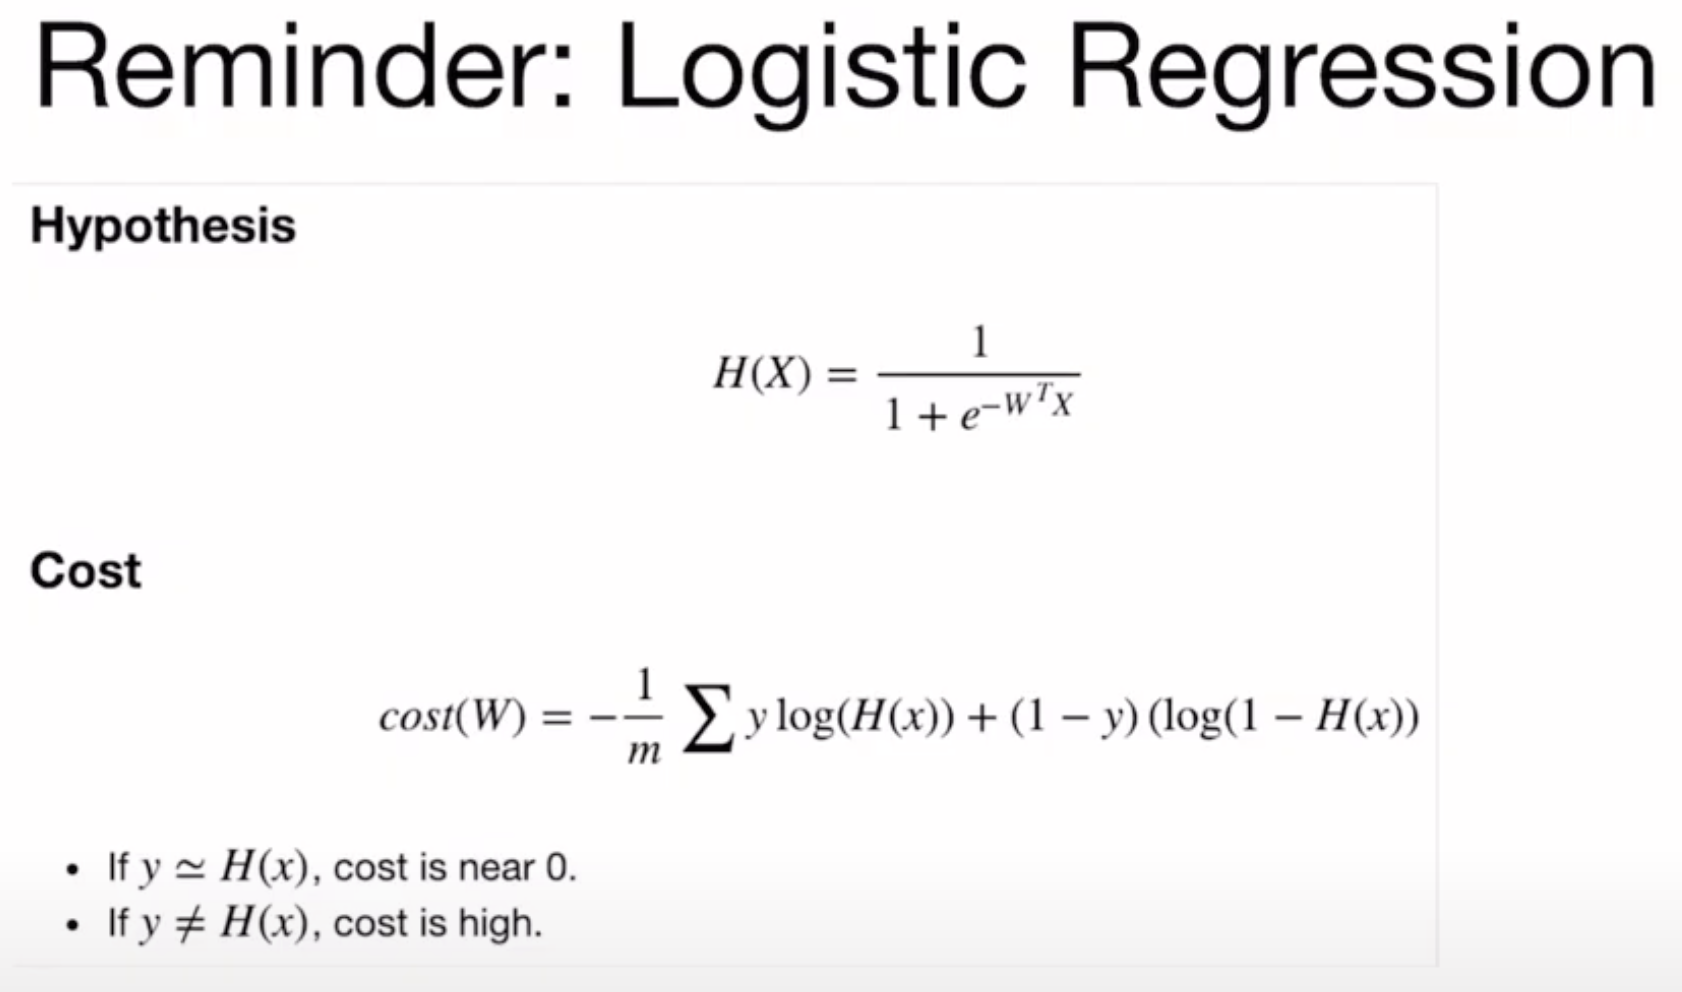

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [57]:
#For reporducibility 
torch.manual_seed(1)

In [58]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [0], [0], [0]]


In [59]:
x_train = torch.Tensor(x_data)
y_train = torch.Tensor(y_data)


In [62]:
print(x_train.shape), print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


(None, None)

### H(x) 계산하기

#### $\quad \frac {1}{1 + e^-W^T∙X} = H(x)$ 

Equal()

#### $\quad \frac {1}{1 + e^-(x∙w)} = H(x)$
$ \rightarrow $

#### $\quad \frac {1}{1 + e^-(x∙w + b)} = H(x)$

- `hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))`
- x_train.matmul(W) = [X*W]

In [63]:
print('e^1 Equals  : ', torch.exp(torch.Tensor([1])))

e^1 Equals  :  tensor([2.7183])


In [64]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [68]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) #sigmoid 구현해보기

In [69]:
print(hypothesis) # H(x)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


### Computing the Hypothesis 

- `torch.sigmoid()`

In [70]:
print('1/1+e^{-1} equals' , torch.sigmoid(torch.Tensor([1])))

1/1+e^{-1} equals tensor([0.7311])


In [71]:
hypothesis = torch.sigmoid(x_train.matmul(W) * b)

In [74]:
print(hypothesis)
print(hypothesis.shape)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


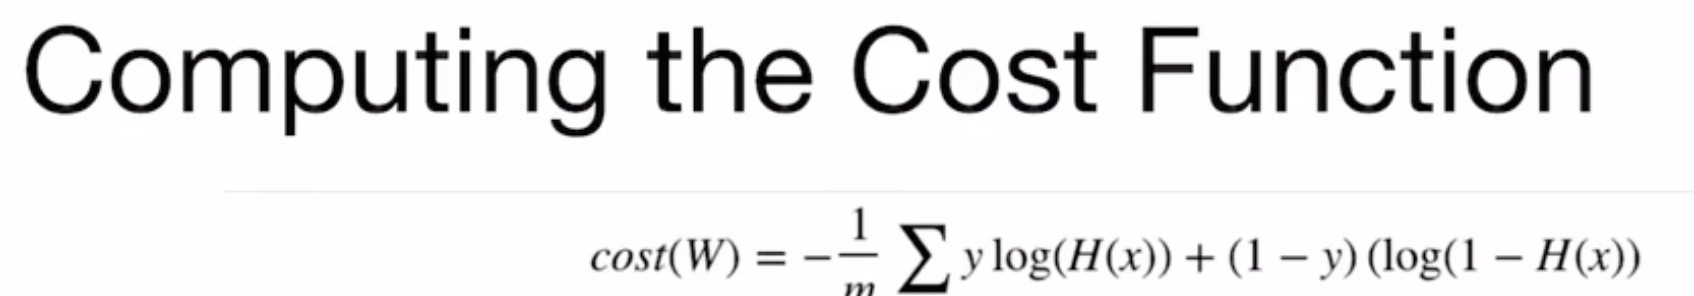

## Logistic Regression 에서 cost fuction 계산하기

In [75]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [77]:
losses = -(y_train * torch.log(hypothesis) + 
  (1 - y_train) * torch.log(1-hypothesis))

print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [78]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


## Logistic Regrssion에서 Cost function 구하기 

- `F.binary_cross_entropy(hypothesis , y_train)`

In [80]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

## Whole Training Proccedure


In [169]:
x_data = [[1,1], [2,2], [3,1], [4,3], [5,5], [6,2], [8,2], [9,1]]
y_data = [[0], [0], [1], [1], [0], [1], [1], [1]]


In [170]:
x_train = torch.Tensor(x_data)
y_train = torch.Tensor(y_data)

In [171]:
# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad = True)

#optimizer 설정
optimizer = optim.SGD([W,b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  #cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  #cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward() #backpropagation
  optimizer.step() 
  #W와 b는 gradient를 구해졌으니, cost 값을 줄이는 방향 Minimize 하는 방향으로 W와 b의 값을 업데이트 함.

  #100번마다 로그 출력
  if epoch%100 == 0:
    print("Epoch {:4d}/{} Cost:{:.6f}".format(
        epoch, nb_epochs, cost.item()
    ))


Epoch    0/1000 Cost:0.693147
Epoch  100/1000 Cost:0.068368
Epoch  200/1000 Cost:0.040093
Epoch  300/1000 Cost:0.028246
Epoch  400/1000 Cost:0.021746
Epoch  500/1000 Cost:0.017650
Epoch  600/1000 Cost:0.014839
Epoch  700/1000 Cost:0.012792
Epoch  800/1000 Cost:0.011236
Epoch  900/1000 Cost:0.010015
Epoch 1000/1000 Cost:0.009031


In [172]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.0124],
        [0.0129],
        [1.0000],
        [0.9684],
        [0.0145],
        [1.0000],
        [1.0000],
        [1.0000]], grad_fn=<SigmoidBackward0>)


In [173]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(y_train)

tensor([[False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [174]:
correct_prediction = prediction.float() == y_train
print(correct_prediction)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


## 실전에서 하는 것처럼

In [182]:
class BineayClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1) # W : Weight
    self.sigmoid = nn.Sigmoid() # b : Bias
  
  def forward(self , x):
    return self.sigmoid(self.linear(x))
    # x가 linear를 통과하고 그 다음 sigmoid를 통과 그 후 리턴.

In [183]:
model = BineayClassifier()

In [184]:
#optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

  #hypothesis 계산
  hypothesis = model(x_train)

  #cost 계산
  cost = F.binary_cross_entropy(hypothesis , y_train)

  #cost를 통한 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #10번 마다 로그 출력
  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    acc = correct_prediction.sum().item() / len(correct_prediction)

    print("Epoch {:4d}/{} Cost : {:.6f} ACC {:2.2f}%".format(
        epoch, nb_epochs, cost.item() , acc * 100, 
    ))

Epoch    0/100 Cost : 0.554429 ACC 62.50%
Epoch   10/100 Cost : 0.186727 ACC 100.00%
Epoch   20/100 Cost : 0.152933 ACC 100.00%
Epoch   30/100 Cost : 0.131643 ACC 100.00%
Epoch   40/100 Cost : 0.115600 ACC 100.00%
Epoch   50/100 Cost : 0.103084 ACC 100.00%
Epoch   60/100 Cost : 0.093048 ACC 100.00%
Epoch   70/100 Cost : 0.084817 ACC 100.00%
Epoch   80/100 Cost : 0.077941 ACC 100.00%
Epoch   90/100 Cost : 0.072105 ACC 100.00%
Epoch  100/100 Cost : 0.067089 ACC 100.00%


# Softmax Classification

- softmax
- Cross Entropy
- Low-level Implementation
- High-level Implementation
- Training Example

In [185]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

### discrete(이산) Probability Distribution 
-> 이산확률분포

In [186]:
z = torch.Tensor([1,2,3])

In [191]:
#합쳐서 1이 되는 확률 값을 나타내줌
hypothesis = F.softmax(z,dim=0)
print(hypothesis)

# if max를 찍었다면 출력결과가 ([0, 0, 1]) 이 나올 수 있음.

tensor([0.0900, 0.2447, 0.6652])


In [189]:
print(hypothesis.sum())

tensor(1.)


## Cross Entropy

In [193]:
z = torch.rand(3,5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(z)
print(hypothesis)

tensor([[0.4550, 0.5725, 0.4980, 0.9371, 0.6556],
        [0.3138, 0.1980, 0.4162, 0.2843, 0.3398],
        [0.5239, 0.7981, 0.7718, 0.0112, 0.8100]], requires_grad=True)
tensor([[0.1664, 0.1871, 0.1737, 0.2695, 0.2033],
        [0.2002, 0.1783, 0.2218, 0.1944, 0.2054],
        [0.1809, 0.2380, 0.2318, 0.1084, 0.2409]], grad_fn=<SoftmaxBackward0>)


In [210]:
y = torch.randint(5, (3,)).long()
#num class = 0-4 5개
#num samples = 0-2 3개

print(y)

tensor([4, 2, 3])


In [211]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

#위의 tensor([.. , .. , ..]) 에 대해
#one hot 인코딩 시도. & scatter 를 통해 inplace
#unsqueeze(1)은 (..)에서  (.., ..)으로 차원을 증가 시켜줌.  -> 1번째 인덱스 자리.

tensor([[0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

In [212]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)
# cost 계산하기.

tensor(1.7738, grad_fn=<MeanBackward0>)


<!-- #### $\quad L = \frac {1}{N} ∑ \frac -{1}{1 + e^-W^T∙X} $ -->
#### $\quad L = \frac {1}{N} ∑ -y log(ý) $ 계산법

- cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
- F.nll_loss(F.log_softmax(z, dim=1),y)
  - NLL = Negative Log Likelihood
- F.cross_entropy(z,y)

In [215]:
print(z)

tensor([[0.4550, 0.5725, 0.4980, 0.9371, 0.6556],
        [0.3138, 0.1980, 0.4162, 0.2843, 0.3398],
        [0.5239, 0.7981, 0.7718, 0.0112, 0.8100]], requires_grad=True)


In [217]:
print(F.softmax(z,dim=1))

tensor([[0.1664, 0.1871, 0.1737, 0.2695, 0.2033],
        [0.2002, 0.1783, 0.2218, 0.1944, 0.2054],
        [0.1809, 0.2380, 0.2318, 0.1084, 0.2409]], grad_fn=<SoftmaxBackward0>)


In [213]:
torch.log(F.softmax(z, dim=1))

tensor([[-1.7935, -1.6760, -1.7504, -1.3114, -1.5929],
        [-1.6086, -1.7244, -1.5062, -1.6381, -1.5826],
        [-1.7096, -1.4354, -1.4617, -2.2223, -1.4236]], grad_fn=<LogBackward0>)

In [214]:
F.log_softmax(z, dim =1)

tensor([[-1.7935, -1.6760, -1.7504, -1.3114, -1.5929],
        [-1.6086, -1.7244, -1.5062, -1.6381, -1.5826],
        [-1.7096, -1.4354, -1.4617, -2.2223, -1.4236]],
       grad_fn=<LogSoftmaxBackward0>)

In [216]:
F.nll_loss (F.log_softmax(z, dim=1), y)

tensor(1.7738, grad_fn=<NllLossBackward0>)

In [218]:
F.cross_entropy(z,y)

tensor(1.7738, grad_fn=<NllLossBackward0>)

## Fitting

In [219]:
x_train = [[1,2,1,1],
           [2,1,3,2],
           [3,1,3,4],
           [4,1,5,5],
           [1,7,5,5],
           [1,2,5,6],
           [1,6,6,6],
           [1,7,7,7]]

y_train = [2,2,2,1,1,1,0,0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)


# x_train.shape = (m,4)
# y_train.shape = (m) -> class => 3개

In [228]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr = 0.1)

nb_epoches = 1000
for epoch in range(nb_epochs + 1):

  #cost 계산
  # hypothesis = F.softmax(x_train.matmul(W) + b, dim =1)
  # y_one_hot = torch.zeros_like(hypothesis)
  # y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
  # cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()

  hypothesis = x_train.matmul(W) + b
  cost = F.cross_entropy(hypothesis, y_train)

  #cost 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print("Epoch {:4d}/{} Cost: {:.6f}".format(
        epoch, nb_epoches, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch   10/1000 Cost: 1.069288
Epoch   20/1000 Cost: 0.960612
Epoch   30/1000 Cost: 0.901738
Epoch   40/1000 Cost: 0.863738
Epoch   50/1000 Cost: 0.836334
Epoch   60/1000 Cost: 0.815246
Epoch   70/1000 Cost: 0.798249
Epoch   80/1000 Cost: 0.784040
Epoch   90/1000 Cost: 0.771814
Epoch  100/1000 Cost: 0.761050


## High-level Implementation with nn.Module

In [238]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3) #output 이 3이기 때문

  def forward(self, x): # -> forward를 통과 하고 나면 |x| = (m,4) => (m,3)
    return self.linear(x)

In [239]:
model = SoftmaxClassifierModel()

In [251]:
# W = torch.zeros((4,3), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  #cost 계산
  # hypothesis = F.softmax(x_train.matmul(W) + b, dim =1)
  # y_one_hot = torch.zeros_like(hypothesis)
  # y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
  # cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()

  # hypothesis = x_train.matmul(W) + b
  pred = model(x_train)
  cost = F.cross_entropy(pred, y_train)

  #cost 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print("Epoch {:4d}/{} Cost: {:.6f}".format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.000642
Epoch  100/1000 Cost: 0.000642
Epoch  200/1000 Cost: 0.000641
Epoch  300/1000 Cost: 0.000641
Epoch  400/1000 Cost: 0.000641
Epoch  500/1000 Cost: 0.000641
Epoch  600/1000 Cost: 0.000641
Epoch  700/1000 Cost: 0.000641
Epoch  800/1000 Cost: 0.000641
Epoch  900/1000 Cost: 0.000641
Epoch 1000/1000 Cost: 0.000641


# Tips

## Reminder : Maximum Likelihood Estimation (MLE)
- 최대 가늠도 추청.


### $\quad P(K=𝒌) = ( \frac {𝒏}{𝒌} ) ・ θ^𝒌 ・ (1-θ)^{𝒏-𝒌} $

>> EQUAL 

###  $ \quad \frac {𝒏!}{𝒌!(𝒏-𝒌)!} ・ θ^𝒌  (1-θ)^{𝒏-𝒌} $


- P값이 Max가 되는 θ 값을 찾는것이 `MLE` 이다.
- 이 θ 값을 찾기 위해서는 Gradient를 descent 과정을 반복해야 한다. 이 때 수식은
  -  $ \quad min(θ) = θ - ⋉・⊽θ ・ L(x, θ) $
    - 이 떄 ⊽θ 와 L(x, θ) 의 θ 는 다른 값이다.
  - L : loss 함수
  - x : train 데이터
  - θ : cost 함수의 값
  - ⊽θ : 손실 함수 의 값을 θ에 대해 미분.
  - ⋉ : Learing Rate 를 곱함.


## Regularization 

- Early Stopping 
  - val loss 값이 더 이상 낮아지지 않을 때
- Reducing Network Size
  - 딥러닝에 한 해 , Neural Network size를 줄이는 방법도 효과적. -> 학습할 수 있는 량을 줄임.
- Weight Decay
  - Neural Network parameta를 조절
- `Dropout`
- `Batch Normalization`
  - 이 두개가 자주 쓰임.

In [252]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(42)

In [265]:
x_train = torch.Tensor([[1,2,1],
                       [1,3,2],
                       [1,3,4],
                       [1,5,5],
                       [1,7,5],
                       [1,2,5],
                       [1,6,6],
                       [1,7,7]])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

# x_train = (m,3)
# y_train = (m)

In [266]:
x_test = torch.FloatTensor([[2,1,1], [3,1,2], [3,3,4]])
y_test = torch.LongTensor([2,2,2])

#x_test = (m,3)
#y_test = m

In [267]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,3) 
    # 3개의 Element를 가진 벡터를 입력으로 받아서
    # 3개의 Element를 가진 output으로 return

    # |x| = (m,3) -> (m,3)
  
  def forward(self, x):
    return self.linear(x)
  

In [268]:
model = SoftmaxClassifierModel()

In [269]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [270]:
def train(model, optimizer, x_trian, y_train):
  nb_epochs = 20

  for epoch in range(nb_epochs):
    
    prediction = model(x_train)
    # |x_train| = (m,3)
    #  transpose
    # |prediction| = (m,3) 

    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print("Epoch {:4d}/{} Cost : {:.6f}".format(
        epoch, nb_epochs, cost.item(),
    ))

In [271]:
def test(model, optimizer, x_test, y_test):
  prediction = model(x_test)
    # |x_test| = (m,3)
    #  transpose
    # |prediction| = (m,3) 
  predicted_classes = prediction.max(1)[1]
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction, y_test) #현재 loss 값

  print("ACC {}% Cost : {:.6f}".format(
        correct_count / len(y_test) * 100 , cost.item(),
    ))

In [272]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost : 1.315669
Epoch    1/20 Cost : 1.141099
Epoch    2/20 Cost : 1.078216
Epoch    3/20 Cost : 1.066048
Epoch    4/20 Cost : 1.055969
Epoch    5/20 Cost : 1.046426
Epoch    6/20 Cost : 1.037315
Epoch    7/20 Cost : 1.028564
Epoch    8/20 Cost : 1.020138
Epoch    9/20 Cost : 1.012005
Epoch   10/20 Cost : 1.004145
Epoch   11/20 Cost : 0.996541
Epoch   12/20 Cost : 0.989178
Epoch   13/20 Cost : 0.982043
Epoch   14/20 Cost : 0.975126
Epoch   15/20 Cost : 0.968415
Epoch   16/20 Cost : 0.961901
Epoch   17/20 Cost : 0.955574
Epoch   18/20 Cost : 0.949427
Epoch   19/20 Cost : 0.943450


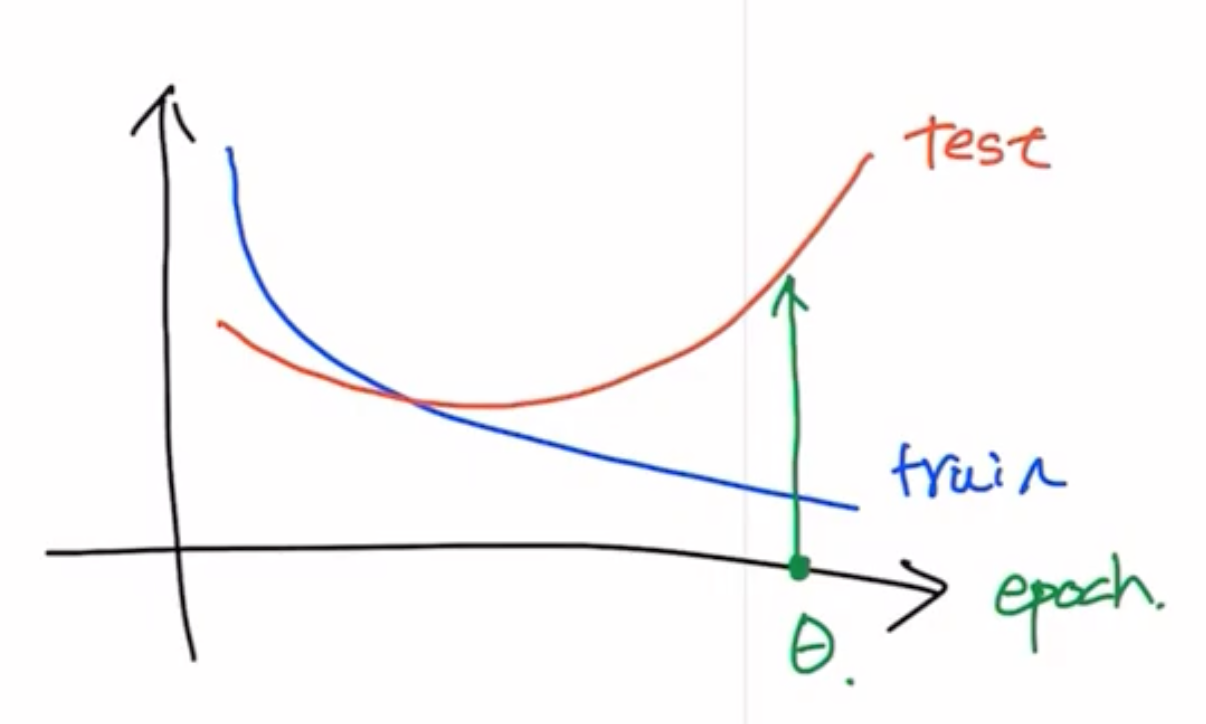

In [275]:
test(model, optimizer, x_test, x_test)

# 이미 최적의 모델을 지나침.

ACC 33.33333333333333% Cost : 7.518572


### Learing Rate

In [282]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e5)

#학습률이 클 때.
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost : 2.468834
Epoch    1/20 Cost : 1114935.000000
Epoch    2/20 Cost : 2266106.000000
Epoch    3/20 Cost : 678997.437500
Epoch    4/20 Cost : 1452043.625000
Epoch    5/20 Cost : 1072362.500000
Epoch    6/20 Cost : 1368060.000000
Epoch    7/20 Cost : 1573918.625000
Epoch    8/20 Cost : 932122.375000
Epoch    9/20 Cost : 821147.750000
Epoch   10/20 Cost : 977050.000000
Epoch   11/20 Cost : 1560247.500000
Epoch   12/20 Cost : 1308293.625000
Epoch   13/20 Cost : 1124309.875000
Epoch   14/20 Cost : 616725.500000
Epoch   15/20 Cost : 665054.812500
Epoch   16/20 Cost : 969237.562500
Epoch   17/20 Cost : 1308293.625000
Epoch   18/20 Cost : 1661810.000000
Epoch   19/20 Cost : 523322.125000


In [304]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

#학습률이 클 때.
train(model, optimizer, x_train, y_train)

ValueError: ignored

In [302]:
test(model, optimizer, x_test, y_test)

ACC 0.0% Cost : 1.247854


### Data Preprocessing (scaling)

In [360]:
x_train = torch.FloatTensor([[73, 80, 75], 
                        [93, 88, 93],
                        [89, 91, 90],
                        [96, 98, 100],
                        [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [361]:
mu = x_train.mean(dim =0)
sigma = x_train.std(dim = 0)

In [362]:
norm_x_train = (x_train - mu) / sigma

print(norm_x_train)
print(sigma), print(mu)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])
tensor([11.0544, 12.2393, 12.6214])
tensor([84.8000, 84.6000, 85.6000])


(None, None)

In [432]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, x):
    return self.linear(x)  

In [433]:
model = MultivariateLinearRegressionModel()

In [434]:
optimizer = optim.SGD(model.parameters() , lr = 0.1)

In [435]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):

    pred = model(x_train)

    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print("Epoch {:4d}/{} Cost : {:.6f}".format(
      epoch, nb_epochs, cost.item(),
    ))

In [436]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost : 29881.121094
Epoch    1/20 Cost : 18965.636719
Epoch    2/20 Cost : 12092.113281
Epoch    3/20 Cost : 7725.761719
Epoch    4/20 Cost : 4940.812012
Epoch    5/20 Cost : 3161.208984
Epoch    6/20 Cost : 2023.062134
Epoch    7/20 Cost : 1294.876587
Epoch    8/20 Cost : 828.899109
Epoch    9/20 Cost : 530.687683
Epoch   10/20 Cost : 339.832031
Epoch   11/20 Cost : 217.680023
Epoch   12/20 Cost : 139.497528
Epoch   13/20 Cost : 89.455338
Epoch   14/20 Cost : 57.423176
Epoch   15/20 Cost : 36.917671
Epoch   16/20 Cost : 23.789316
Epoch   17/20 Cost : 15.382482
Epoch   18/20 Cost : 9.997652
Epoch   19/20 Cost : 6.547043
